In [136]:
# Todo código siempre debe tener un comentario

In [137]:
# Variables
variable = 10

In [138]:
# Imprimir variable
print(variable)

10


In [139]:
# Tipos de datos
a=10
b=20
print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a % b)

30
-10
200
0.5
10


In [140]:
# para mayor cantidad de datos
import numpy as np
vector = np.array([1,2,3,4,5])
print(vector)
vector*2

[1 2 3 4 5]


array([ 2,  4,  6,  8, 10])

In [141]:
# Suma de vectores
otro_vector = np.array([10,20,30,40,50])
print(vector + otro_vector)

[11 22 33 44 55]


In [142]:
# para tablas
import pandas as pd

In [143]:
# Leer un archivo csv
df = pd.read_csv('https://raw.githubusercontent.com/LuisPerezTimana/Webinars/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [144]:
# Para ver las primeras filas
df = df.loc[:,['Glucose','BMI','Outcome']]
df.Glucose

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [145]:
# Filtrar datos
df_filtrado = df[df.BMI > 50]
df_filtrado

,Glucose,BMI,Outcome
120,162,53.2,1
125,88,55.0,1
177,129,67.1,1
193,135,52.3,1
247,165,52.3,0
303,115,52.9,1
445,180,59.4,1
673,123,57.3,0


In [146]:
# Estadísticas descriptivas
df.describe()


,Glucose,BMI,Outcome
count,768.000000,768.000000,768.000000
mean,120.894531,31.992578,0.348958
std,31.972618,7.884160,0.476951
min,0.000000,0.000000,0.000000
25%,99.000000,27.300000,0.000000
50%,117.000000,32.000000,0.000000
75%,140.250000,36.600000,1.000000
max,199.000000,67.100000,1.000000


In [147]:
# Gráficos
import matplotlib.pyplot as plt

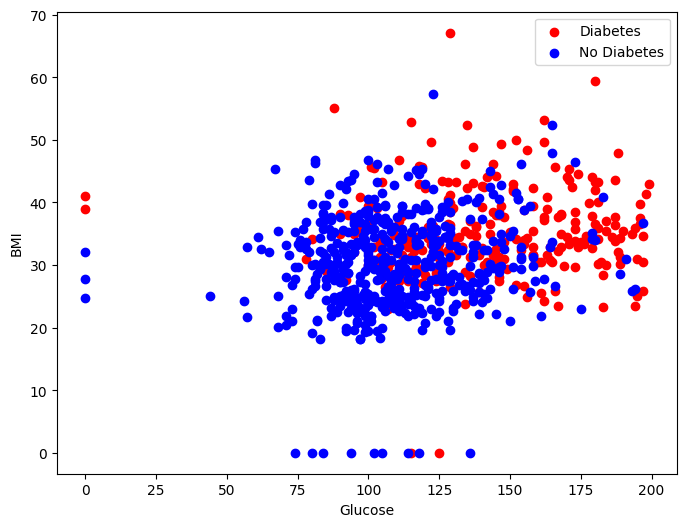

In [148]:
# Grafico de puntos
D = df[df.Outcome == 1]
C = df[df.Outcome == 0]
plt.figure(figsize=(8,6))
plt.scatter(D.Glucose, D.BMI, color='red', label='Diabetes')
plt.scatter(C.Glucose, C.BMI, color='blue', label='No Diabetes')
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [149]:
# Separar la información en X e Y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x)
print(y)

     Glucose   BMI
0        148  33.6
1         85  26.6
2        183  23.3
3         89  28.1
4        137  43.1
..       ...   ...
763      101  32.9
764      122  36.8
765      121  26.2
766      126  30.1
767       93  30.4

[768 rows x 2 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [150]:
# Estandarizar los datos
from sklearn.preprocessing import StandardScaler

In [151]:
# Estandarizar los datos
scaler = StandardScaler()
x_standar = scaler.fit_transform(x)
print(x_standar)

[[ 0.84832379  0.20401277]
 [-1.12339636 -0.68442195]
 [ 1.94372388 -1.10325546]
 ...
 [ 0.00330087 -0.73518964]
 [ 0.1597866  -0.24020459]
 [-0.8730192  -0.20212881]]


In [152]:
# División de los datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_standar, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)

(614, 2)
(154, 2)


In [153]:
# Entrenar un modelo de regresión logística
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf

RandomForestClassifier()

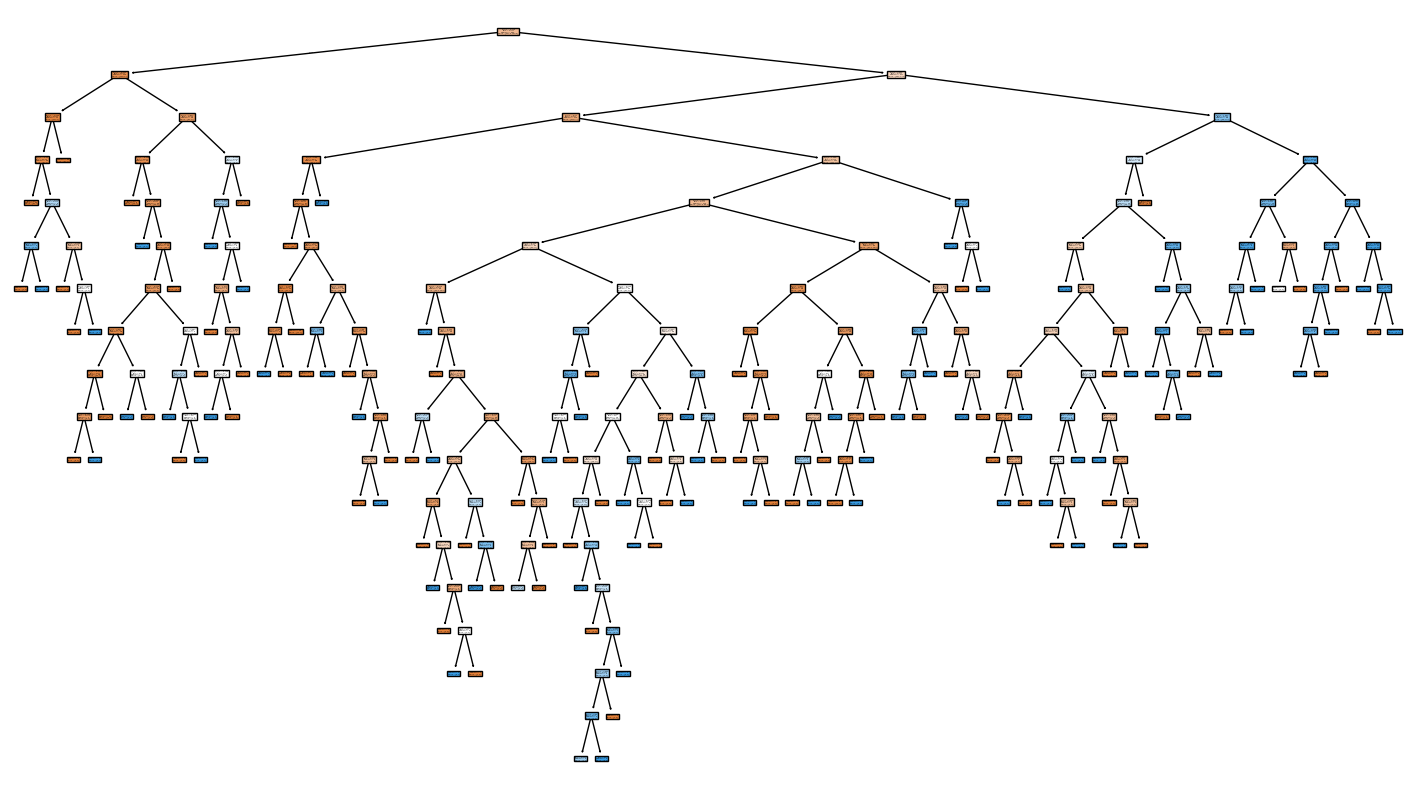

In [155]:
from sklearn import tree

plt.figure(figsize=(18,10))

tree.plot_tree(rf.estimators_[0], filled=True)

plt.show()

In [156]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [157]:
rf.predict_proba(x_test)[:,1]

array([0.15416667, 0.4675    , 0.        , 0.33      , 0.35      ,
       0.06      , 0.67      , 0.        , 0.35      , 0.43      ,
       0.465     , 0.        , 0.59      , 0.9       , 0.54      ,
       0.6397619 , 0.61      , 0.4       , 0.        , 0.18      ,
       0.57      , 0.03      , 0.62      , 0.22      , 0.17666667,
       0.3       , 0.41      , 0.64559524, 0.03      , 0.29      ,
       0.11      , 0.285     , 0.        , 0.95      , 0.26      ,
       0.44      , 0.03      , 0.36      , 0.        , 0.74      ,
       0.12      , 0.3       , 0.06      , 0.535     , 0.00666667,
       0.        , 0.83      , 0.76      , 0.        , 0.16      ,
       0.01      , 0.21833333, 0.45916667, 0.01      , 0.69      ,
       0.01      , 0.45      , 0.01      , 0.21866667, 0.05      ,
       0.86      , 0.03      , 0.76      , 0.16      , 0.75      ,
       0.34      , 0.02      , 0.05      , 0.74      , 0.74      ,
       0.99      , 0.455     , 0.07      , 0.        , 0.12   

In [158]:
# Evaluar el modelo

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7662337662337663

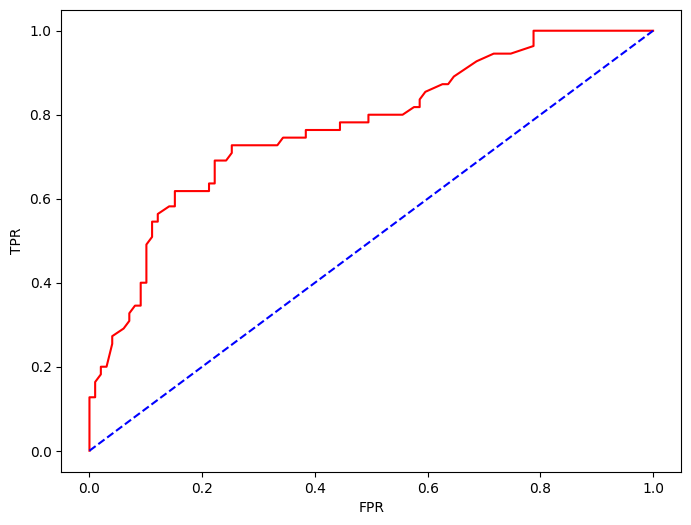

In [177]:
# Curva roc

y_pred_proba = rf.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

roc_auc=roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red')
plt.plot([0,1],[0,1], color='blue', linestyle='--', label= "'Random Forest (AUC = 0'+str(round(roc_auc,2))+')'")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

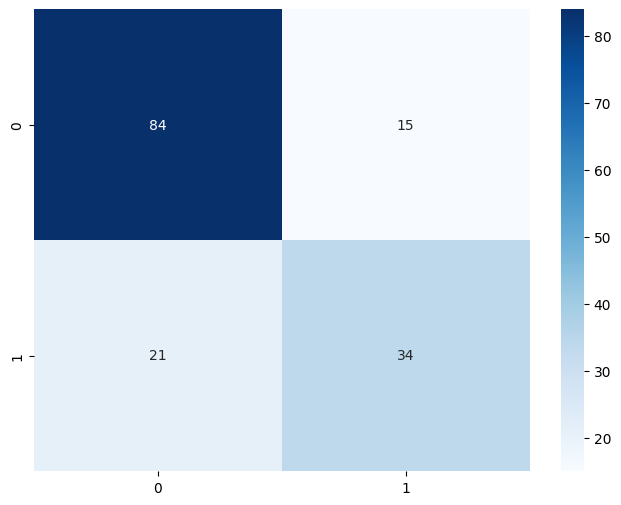

In [165]:
# Matriz de confusión
import seaborn as sns

matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matriz, annot=True, cmap='Blues')

plt.show()

In [170]:
# visualización de las predicciones

x_min,x_max = x.Glucose.min()-1, x.Glucose.max()+1
y_min,y_max = x.BMI.min()-1, x.BMI.max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

matriz = scaler.fit_transform(np.c_[xx.ravel(), yy.ravel()])
matriz

Z = rf.predict(matriz)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

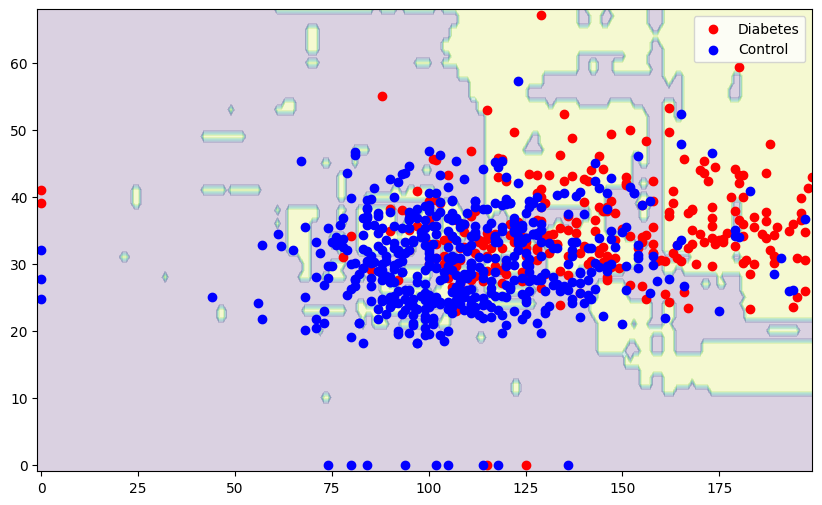

In [174]:
plt.figure(figsize=(10,6))

plt.contourf(xx, yy, Z, alpha=0.2,cmap = 'viridis')
plt.scatter(D.Glucose, D.BMI, color='red', label='Diabetes')
plt.scatter(C.Glucose, C.BMI, color='blue', label='Control')
plt.legend()
plt.show()